Alright, in our previous Notebook, we observed that the exponential growth of AtliQ sales in Chile truly began in August 2021. We realize that this growth wasn't attributed to the sales platform, the product categories, or the products themselves. We see that this growth wasn't exclusive to Chile but occurred throughout Latin America.
In this Notebook, we will uncover why.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from utility import plot_settings
from scripts. used_functions import *

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [7]:
LATAM = pd.read_pickle('../../data/raw/AtliQ_sales_LATAM.pkl')
LATAM['date'] = pd.to_datetime(LATAM['date'])   


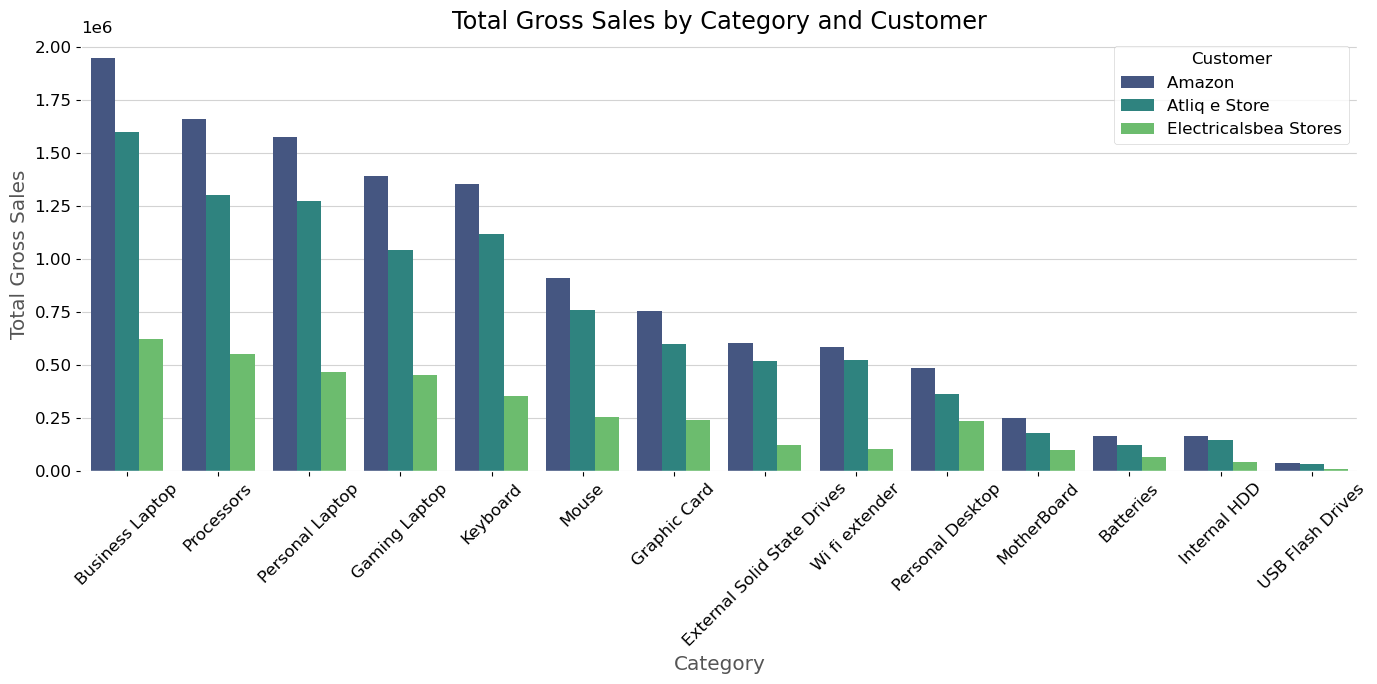

In [8]:
plot_sales_by_category_and_customer(LATAM)

Wow, here we reused a function applied to sales in Chile. We can see that Electricalsbea Stores lags significantly compared to the others, but I believe this might be because this physical store is not present in all countries. Nonetheless, the type of customer and platform are not of our interest since we've already seen that they behave in a very similar manner, right?
What we are interested in is the total sales by category, and what stands out most to me are the Laptops in general. As we saw in our graph matrix by category in Chile, there are many categories that have been in the market for more than two years! But these only began to increase so abruptly from August 2021!

These are the categories I want to visualize, but only those that generate the highest revenue for the business; additionally, I'd like to do it only with those from which I have 5 months of data before August, so I can compare them to the 5 months after. That is, the idea is for the pivotal point to be in the middle.

In [9]:
selected_categories = ['Business Laptop', 'Personal Laptop','Gaming Laptop','Processors','Graphic Card']
top_categories = LATAM.loc[LATAM['category'].isin(selected_categories)]

start_date = '2021-03-01'
end_date = '2022-01-31'

# date range filter
filtered_data = top_categories[(top_categories['date'] >= start_date) & (top_categories['date'] <= end_date)].reset_index(drop=True)

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           7288 non-null   object        
 1   platform           7288 non-null   object        
 2   channel            7288 non-null   object        
 3   market             7288 non-null   object        
 4   date               7288 non-null   datetime64[ns]
 5   sold_quantity      7288 non-null   int64         
 6   division           7288 non-null   object        
 7   segment            7288 non-null   object        
 8   category           7288 non-null   object        
 9   product            7288 non-null   object        
 10  variant            7288 non-null   object        
 11  total_gross_sales  7288 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 683.4+ KB


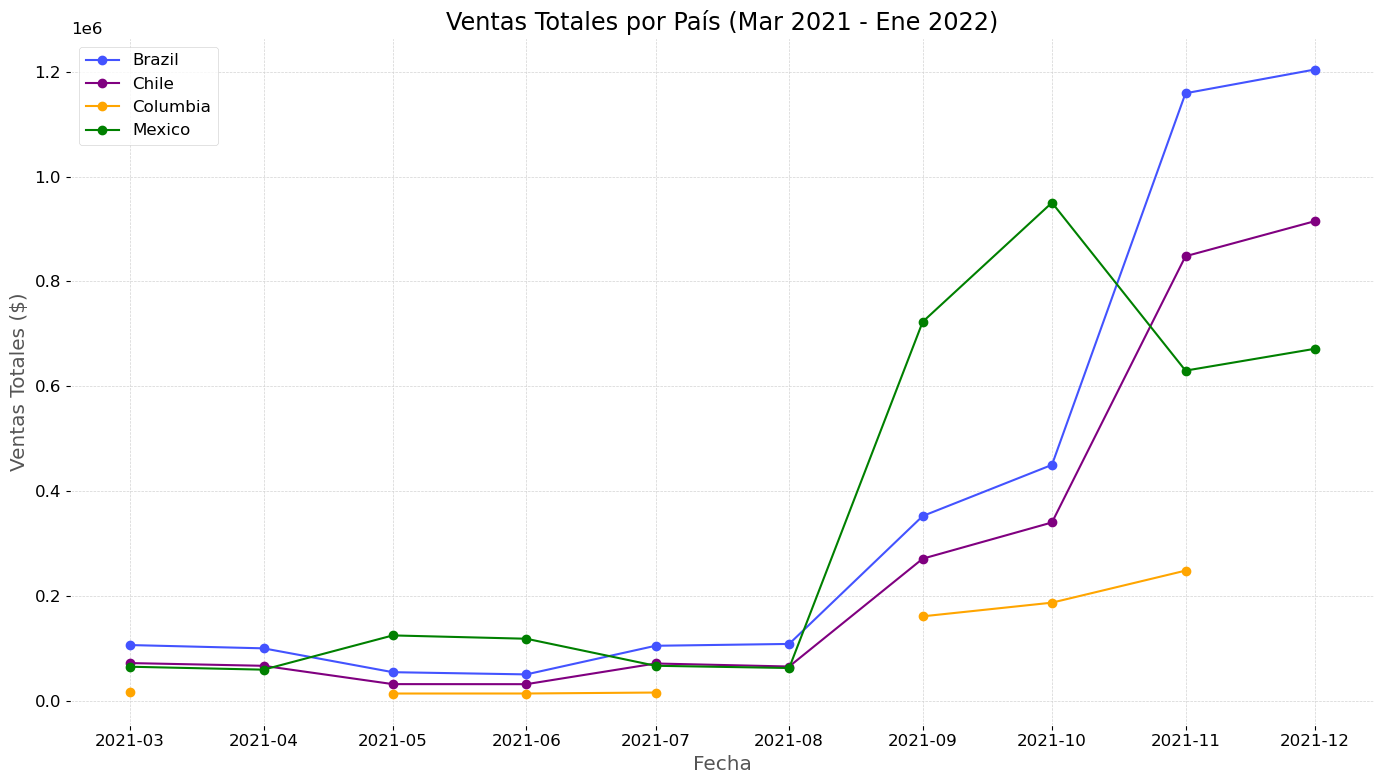

In [10]:

# Agrupar por fecha y país y sumar las ventas totales
grouped_data = filtered_data.groupby(['date', 'market']).sum()['total_gross_sales'].unstack()

# Dibujar la serie temporal para cada país
plt.figure(figsize=(14, 8))
for country in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[country], label=country, marker='o')
    
plt.title('Ventas Totales por País (Mar 2021 - Ene 2022)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales ($)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [11]:
filtered_data.query("market=='Columbia'")['date'].unique()

<DatetimeArray>
['2021-03-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-09-01 00:00:00', '2021-10-01 00:00:00',
 '2021-11-01 00:00:00']
Length: 7, dtype: datetime64[ns]

Okay, we don't have data for April or August in Colombia. Since August is our main month of interest, I will drop the entire country of Colombia. I wouldn't want the analysis to be biased due to missing data, and given that Colombia is the country with the fewest sales and least data, I don't believe it will significantly affect the analysis.

In [12]:
filtered_data2 = filtered_data.loc[~(filtered_data['market']=='Columbia')]
filtered_data2.reset_index(drop=True, inplace=True)
filtered_data2

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Atliq e Store,E-Commerce,Direct,Brazil,2021-03-01,4,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,78.09
1,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-03-01,1,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,19.52
2,Amazon,E-Commerce,Retailer,Chile,2021-03-01,3,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,58.57
3,Amazon,E-Commerce,Retailer,Mexico,2021-03-01,6,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,117.14
4,Amazon,E-Commerce,Retailer,Brazil,2021-03-01,5,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Standard 3,97.62
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,Atliq e Store,E-Commerce,Direct,Mexico,2021-12-01,2,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"1,719.47"
6491,Atliq e Store,E-Commerce,Direct,Brazil,2021-12-01,11,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"9,457.07"
6492,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2021-12-01,4,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"3,438.93"
6493,Amazon,E-Commerce,Retailer,Chile,2021-12-01,7,PC,Desktop,Business Laptop,AQ BZ Allin1 Gen 2,Premium 2,"6,018.13"


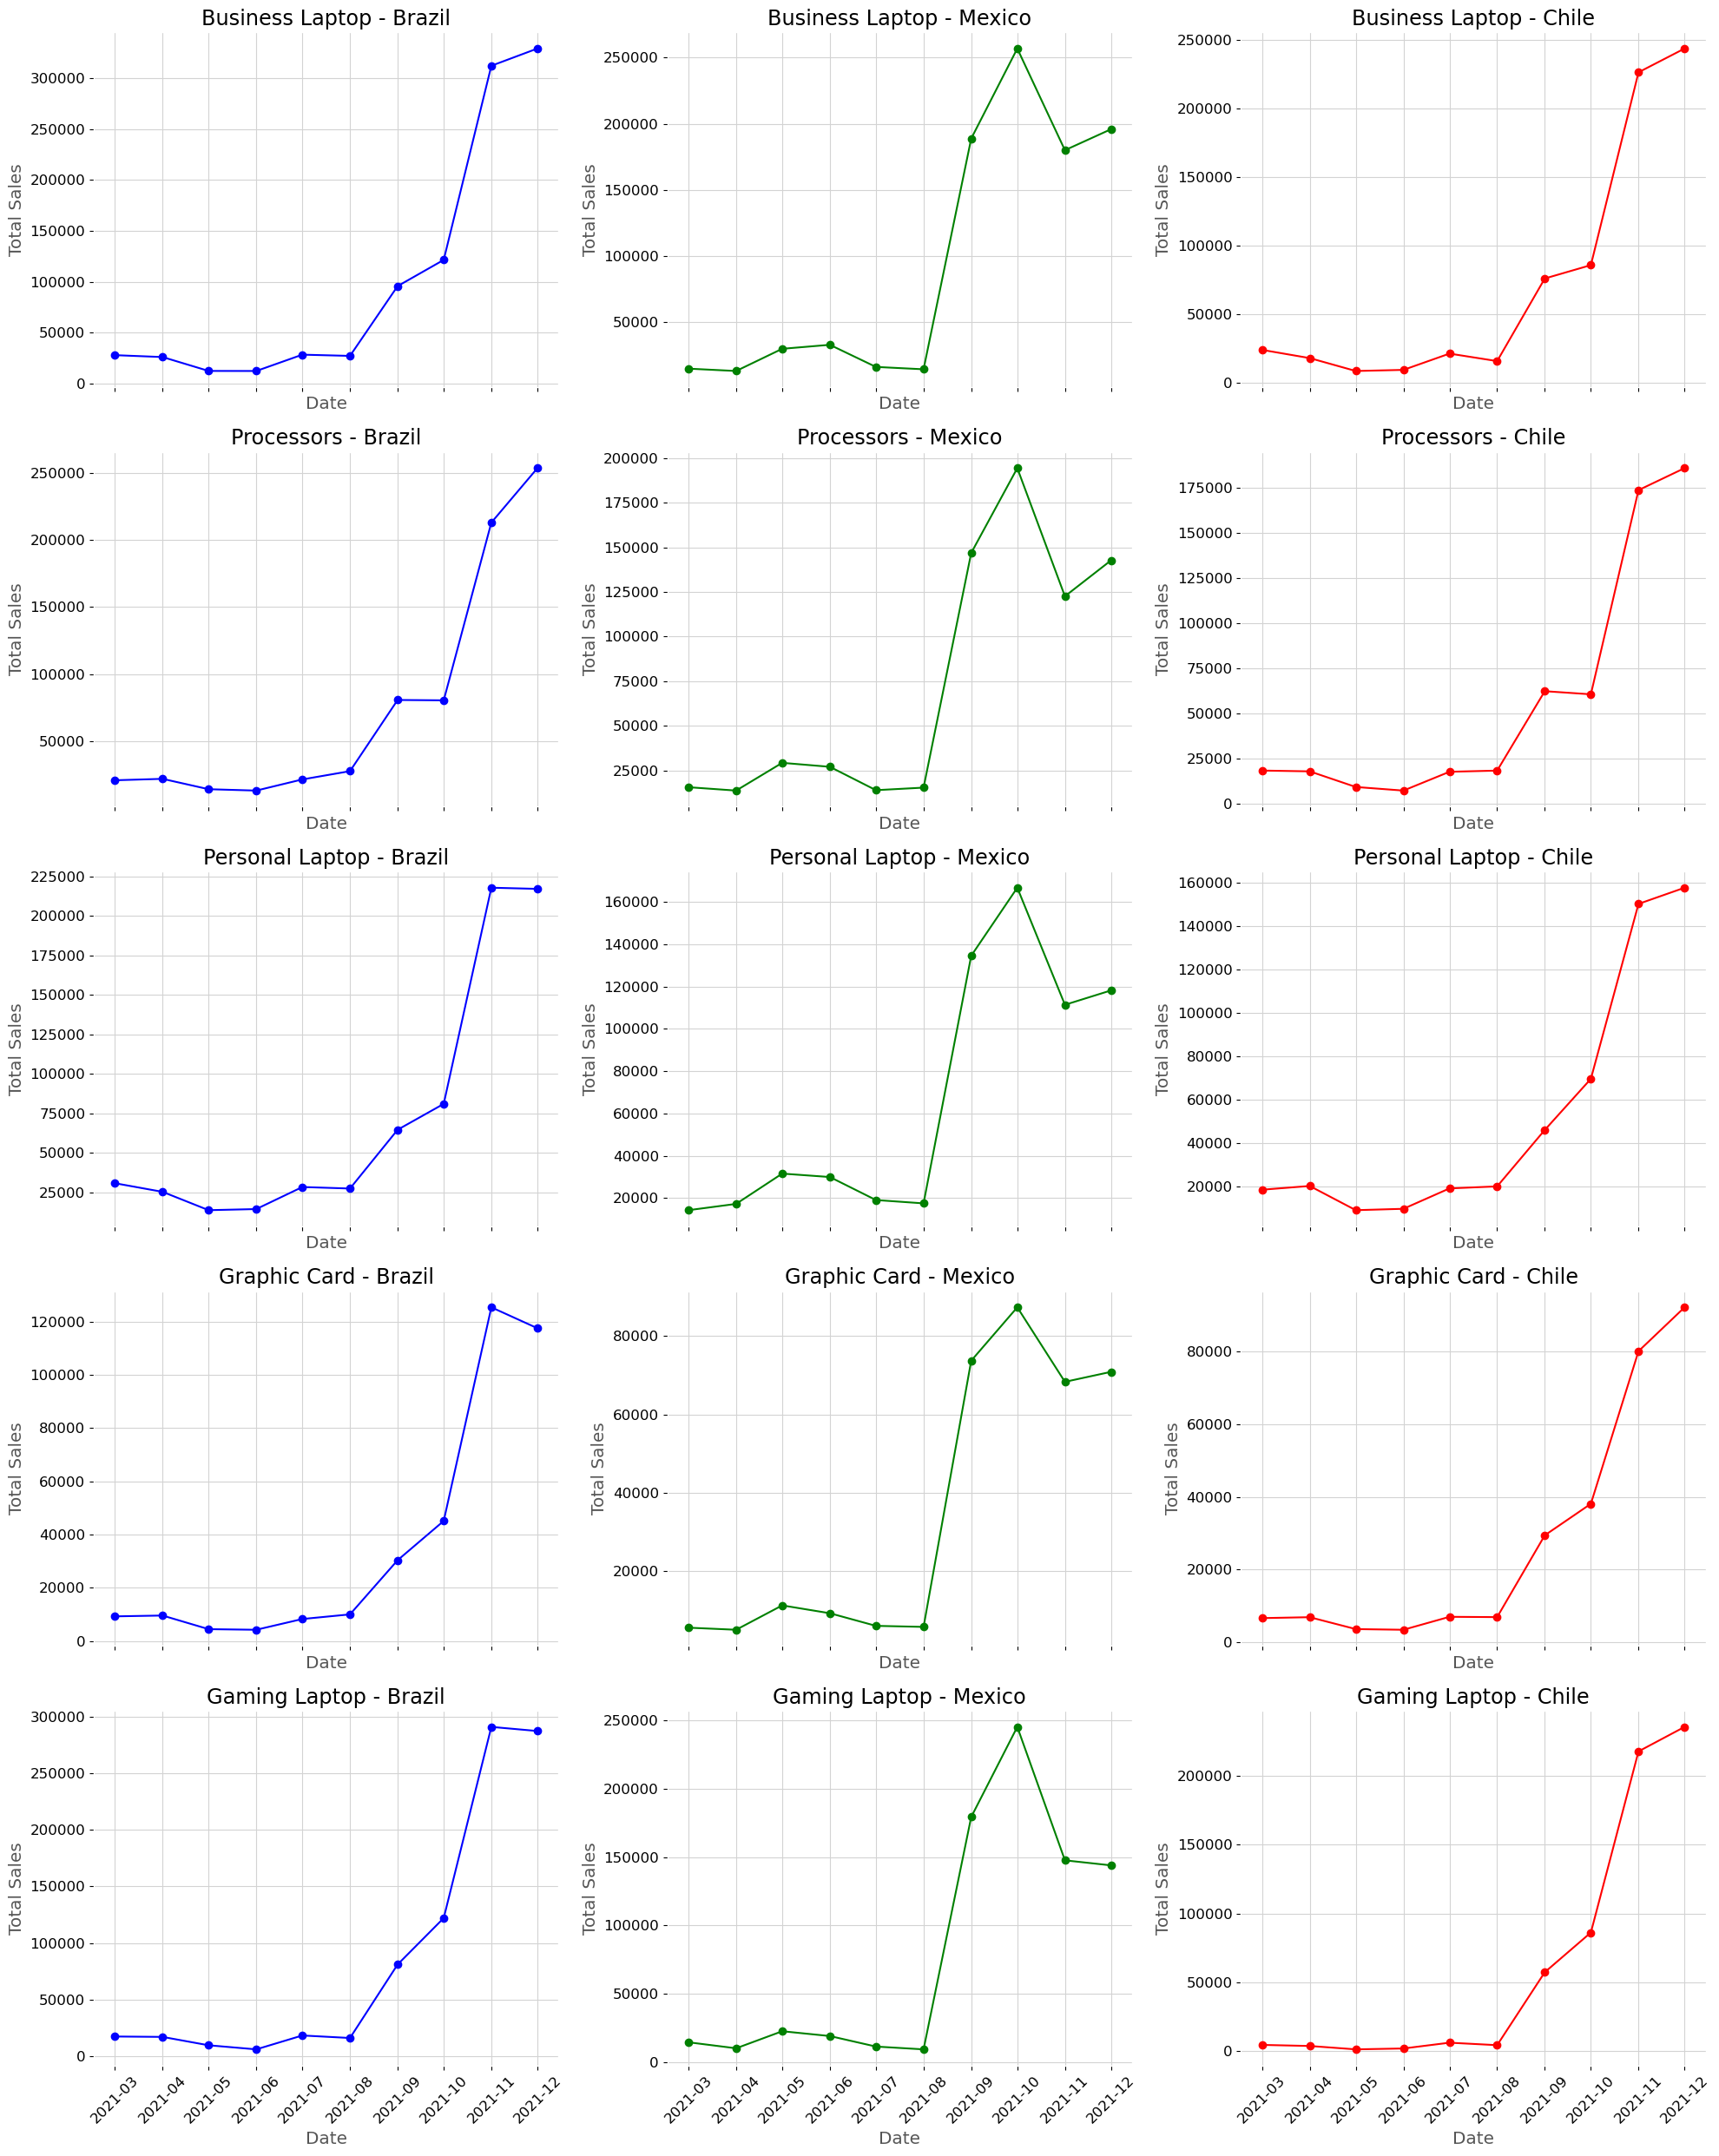

In [13]:
# You can find this function in the used_functions.py file
plot_sales_category_matrix_country(filtered_data2)

I asked Code Interpreter for this graph, and it's amazing! It's a 5x3 matrix where each row is a different category, and each column is a country!
We can see clear trends in the image!!
The drop in Mexico wasn't due to a specific category but rather the entire country. Since these are the most influential categories in sales, the trends here can be generalized to the entire context of AtliQ sales in Latin America.

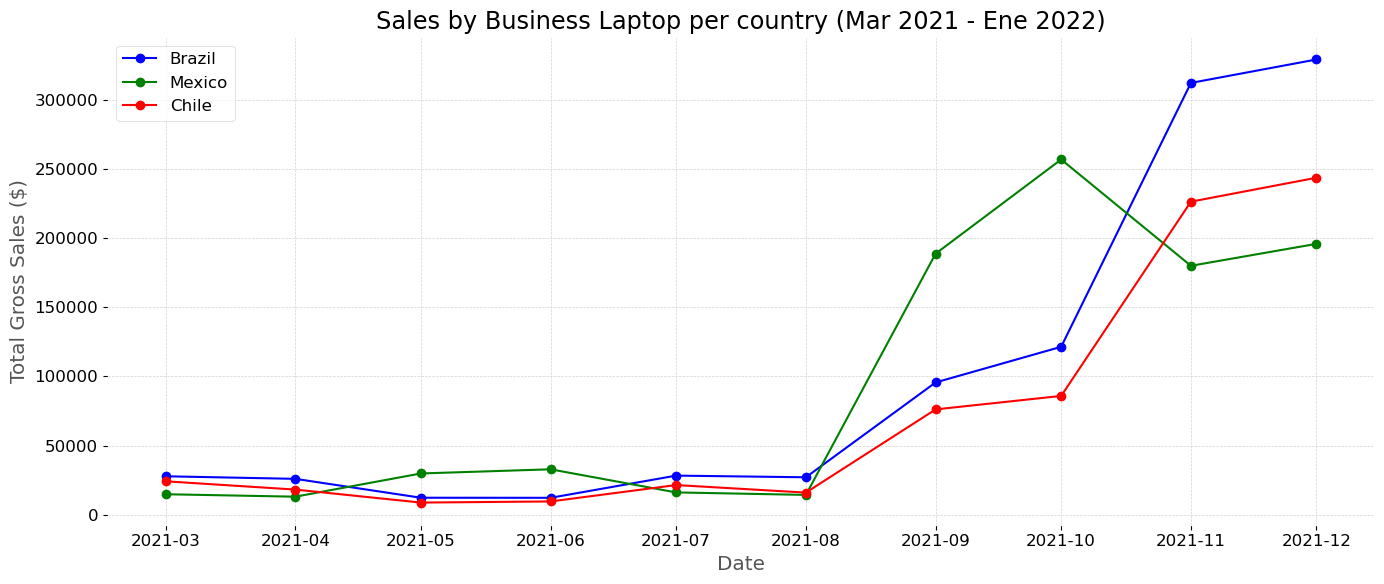

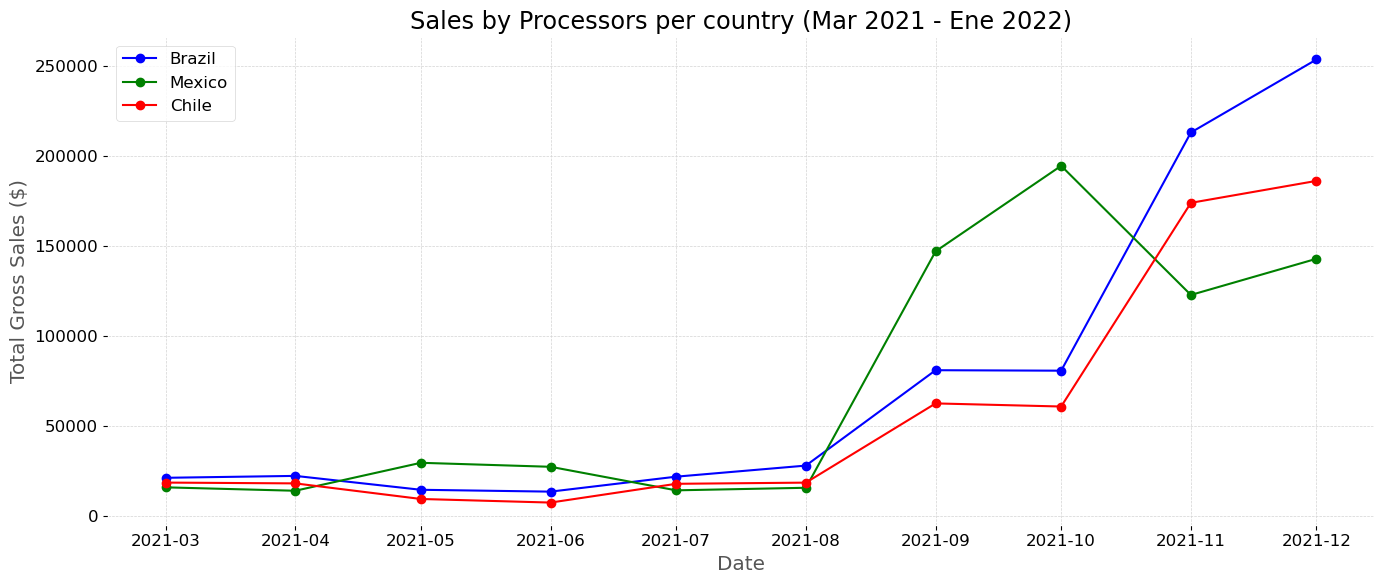

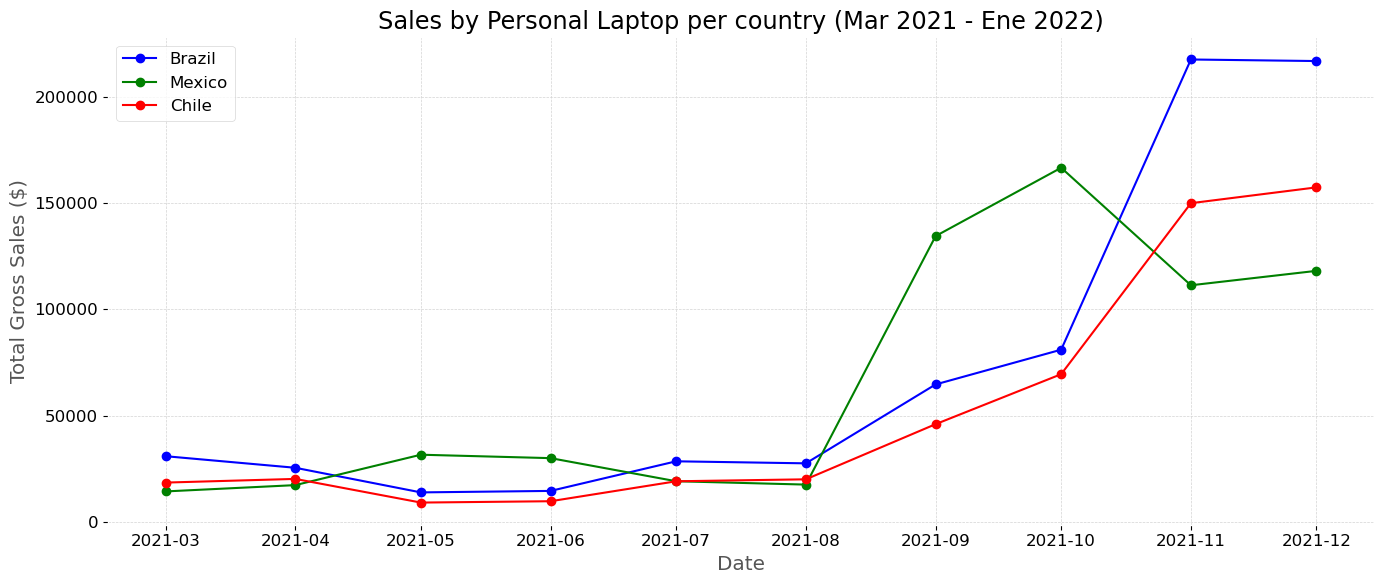

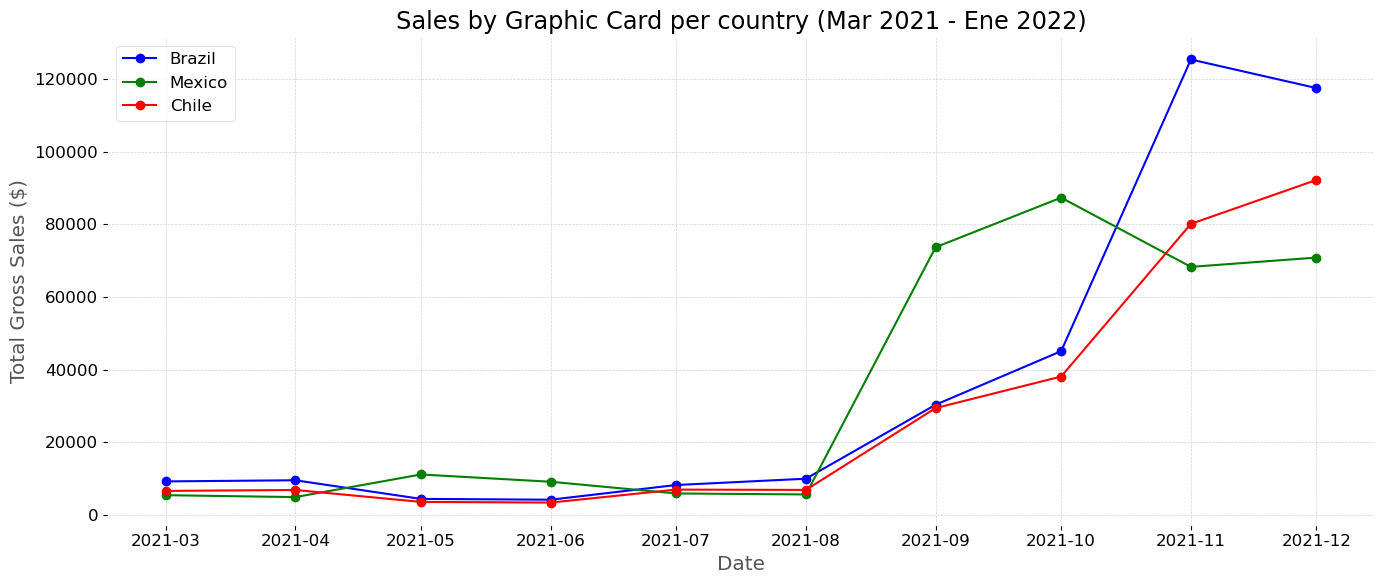

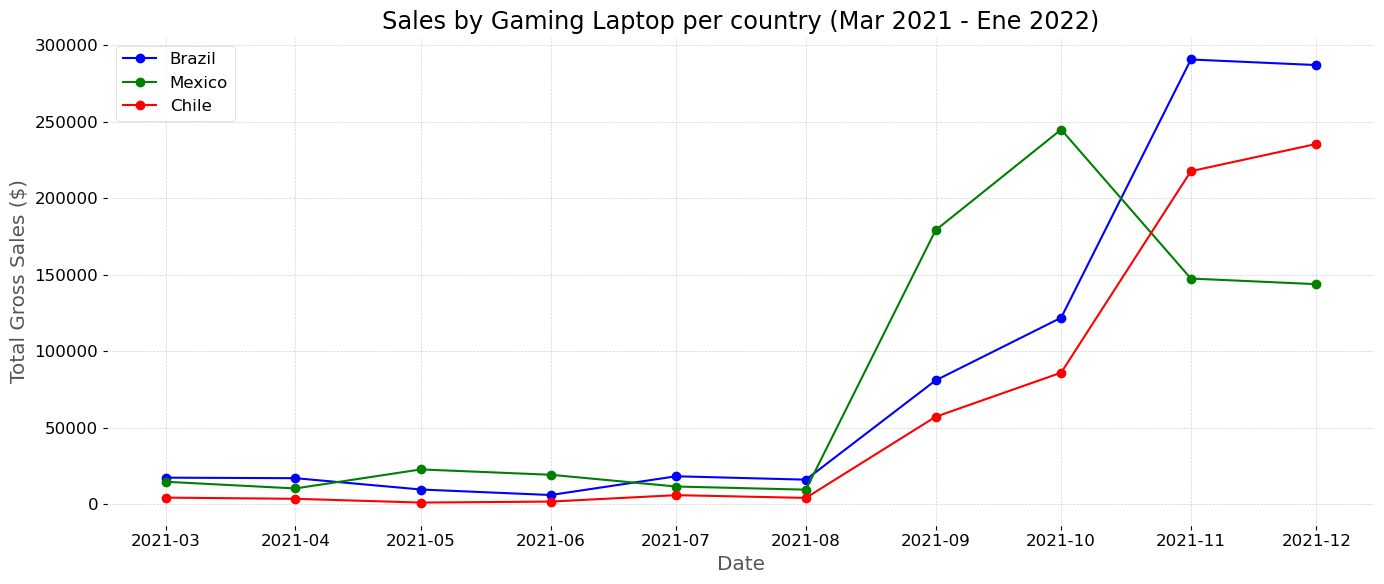

In [14]:
plot_sales_by_selected_categories_countries(filtered_data2)

We can see that sales by country tend to be very similar, although they vary a bit depending on the category! This confirms what was already suspected: Hardware sales in Latin America do not depend on a product, a category, a platform, or even a country!
So, what do they depend on? I believe there are many factors, and if I had to specify one, I'd say market needs!

I didn't find specific information about AtliQ Hardware in August 2021, but I found this: [https://esemanal.mx/2021/08/idc-back-to-school-2021-impulsa-el-negocio-de-hardware-y-conectividad/]. This article mentions the back-to-school post-pandemic period! I will summarize it in the following lines:





# IDC: Back to School 2021 impulsa el negocio de hardware y conectividad
**-El desabasto se presenta como uno de los peores escenarios para el regreso a clases**
Las búsquedas de productos específicos relacionados con el regreso a clases en agosto de 2021 en México, está encabezada por los Classroom (13,600,000); Zoom (5,000,000); Google meet (1,500,000); Laptop (450,000); Computadora (301,000); Celulares (301,000); Impresora (165,000); Audífonos (135,000); Teclado (110,000); Monitor (74,000); Tablet (74,000); Mouse (74,000) y Mochilas (74,000).  

"Si bien hay buenos resultado y expectativas para el back to school 2021, también existen ciertos contratiempos para las categorías de cómputo; una de ellas es el desabasto, si bien la alta demanda de equipos de cómputo persiste, las marcas están teniendo problemas en las entregas y en los tiempos en lo que llega el producto, sobre todo ahora con el back to school que son volúmenes importantes, esto también afecta en el incremento de costos para la logística y se ve reflejado en precios más altos de los equipos" - Bethsabé Gutiérrez.

### Recomendaciones de IDC para el Back To School 2021:
• En 2021 el regreso a clases estará centrado en la renovación de equipos y, convertir el hogar en un punto de productividad y educación a distancia.

- Los usuarios con capacidad e intención de comprar tecnología para educación se centrarán en cómputo y tabletas.

- Las impresoras de tinta continua registrarán un máximo histórico.

- Los puntos de venta harán ofertas en medio de la escasez de ciertos productos de tecnología.

- Laptops inversión a largo plazo: Los usuarios se enfocarán a gama media, entre los 14 mil y 18 mil pesos, con especificaciones robustas.

---
Alright! Based on the information and previous visualizations, I have a hypothesis 😄:

The drastic growth in AtliQ sales in Latin America was due to students' need for a computer for the post-pandemic return to school. Moreover, at that time, I believe there was a shortage of computers, a supply gap that perhaps AtliQ was able to fill and capitalize on sales in the market.

Were AtliQ's sales in Latin America fortunate? Perhaps the post-pandemic situation benefited them, but I think the company knew how to leverage the situation and effectively steer their sales direction.

I wouldn't want this to remain just a hypothesis, so in the next Notebook, we will try to find some patterns in the data.

In [20]:
filtered_data2['date'] = pd.to_datetime(filtered_data2['date'])


filtered_data2 = filtered_data2.sort_values(by='date')

/tmp/ipykernel_18395/1394236834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['date'] = pd.to_datetime(filtered_data2['date'])


In [23]:
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6495 entries, 0 to 6494
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer           6495 non-null   object        
 1   platform           6495 non-null   object        
 2   channel            6495 non-null   object        
 3   market             6495 non-null   object        
 4   date               6495 non-null   datetime64[ns]
 5   sold_quantity      6495 non-null   int64         
 6   division           6495 non-null   object        
 7   segment            6495 non-null   object        
 8   category           6495 non-null   object        
 9   product            6495 non-null   object        
 10  variant            6495 non-null   object        
 11  total_gross_sales  6495 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 659.6+ KB


In [21]:
filtered_data2.to_csv('../../data/interim/LATAM_mar-dec.csv', index=False)